In [2]:
import pandas as pd

results = pd.read_csv('recent copy.csv')


In [5]:
results.head(2)

Fitness  Best fitness  Generation  Last improved geneneration  Xo prob  \
0     8492          8492           0                           0     0.99   
1     8492          8492           1                           0     0.99   

   Mut prob       Selection        Crossover       Mutation  Generations  \
0       0.2  tournament_sel  order_crossover  swap_mutation          100   
1       0.2  tournament_sel  order_crossover  swap_mutation          100   

   Elitism  Tolerance  
0        0         20  
1        0         20

In [4]:
recent = pd.read_csv('recent copy.csv')


In [61]:
recent.head(2)

Fitness  Best fitness  Generation  Last improved geneneration  Xo prob  \
0     8492          8492           0                           0     0.99   
1     8492          8492           1                           0     0.99   

   Mut prob       Selection        Crossover       Mutation  Generations  \
0       0.2  tournament_sel  order_crossover  swap_mutation          100   
1       0.2  tournament_sel  order_crossover  swap_mutation          100   

   Elitism  Tolerance  
0        0         20  
1        0         20

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV results into a DataFrame

# Plot the evolution of bestfit for each selection function
plt.figure(figsize=(14, 8))
for selection_function in results['Selection'].unique():
    subset = results[results['Selection'] == selection_function]
    avg_fitness = subset.groupby('Generation')['Fitness'].mean().reset_index()
    sns.lineplot(x='Generation', y='Fitness', results=subset, label=selection_function)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.title('Evolution of Best Fitness for Different Selection Functions')
plt.legend(loc='best')
plt.show()

# Plot the evolution of bestfit for each mutation function
plt.figure(figsize=(14, 8))
for mutation_function in results['Mutation'].unique():
    subset = results[results['Mutation'] == mutation_function]
    avg_fitness = subset.groupby('Generation')['Fitness'].mean().reset_index()
    sns.lineplot(x='Generations', y='Fitness', results=subset, label=mutation_function)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.title('Evolution of Best Fitness for Different Mutation Functions')
plt.legend(loc='best')
plt.show()

# Plot the evolution of bestfit for each Crossover function
plt.figure(figsize=(14, 8))
for xo_function in results['Crossover'].unique():
    subset = results[results['Crossover'] == xo_function]
    avg_fitness = subset.groupby('Generation')['Fitness'].mean().reset_index()
    sns.lineplot(x='Generation', y='Fitness', results=subset, label=xo_function)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.title('Evolution of Best Fitness for Different Crossover Functions')
plt.legend(loc='best')
plt.show()

ValueError: Could not interpret value `Generation` for parameter `x`

<Figure size 1400x800 with 0 Axes>

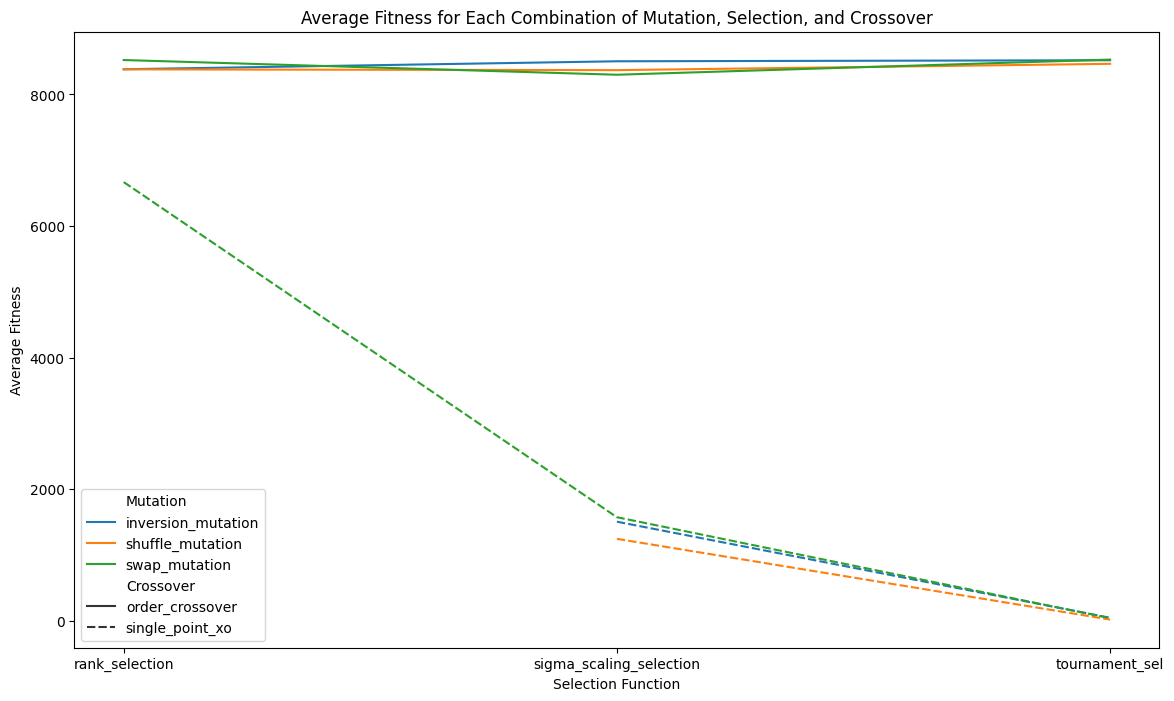

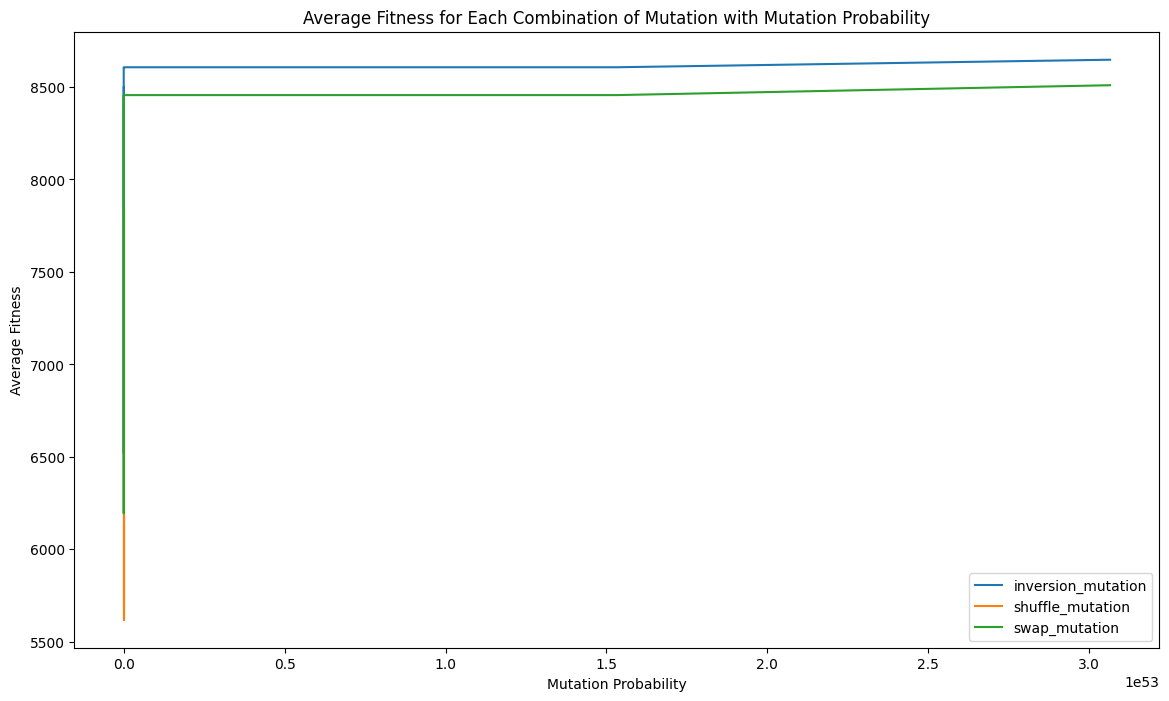

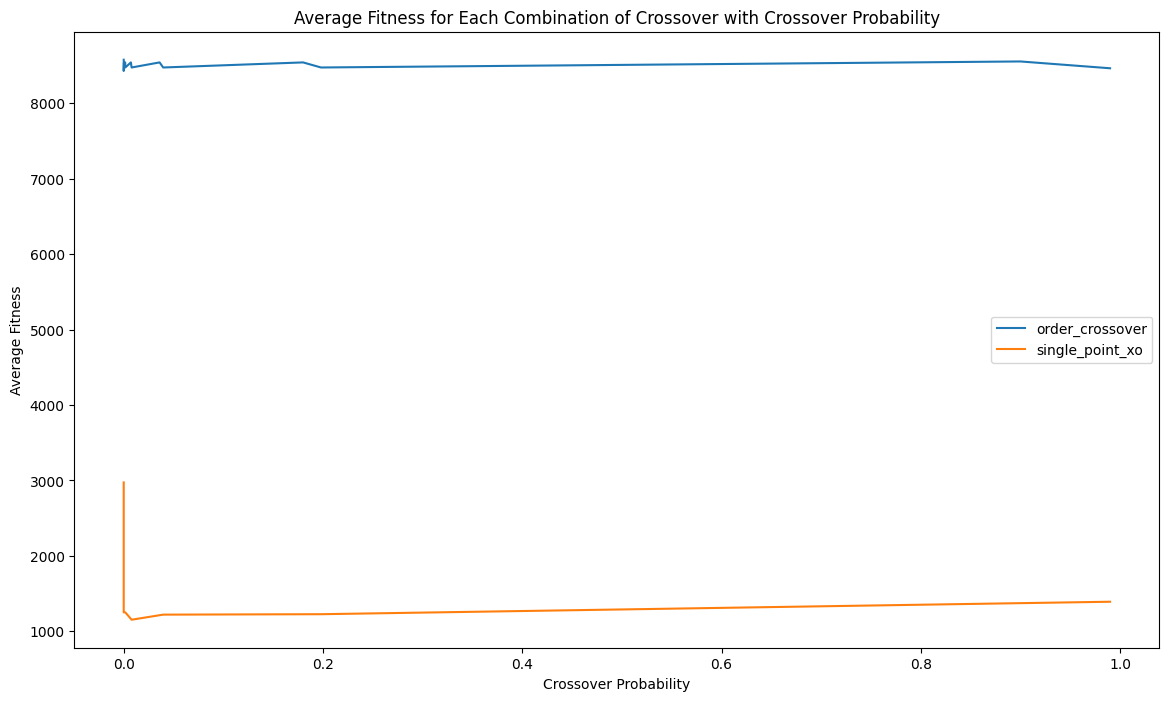

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


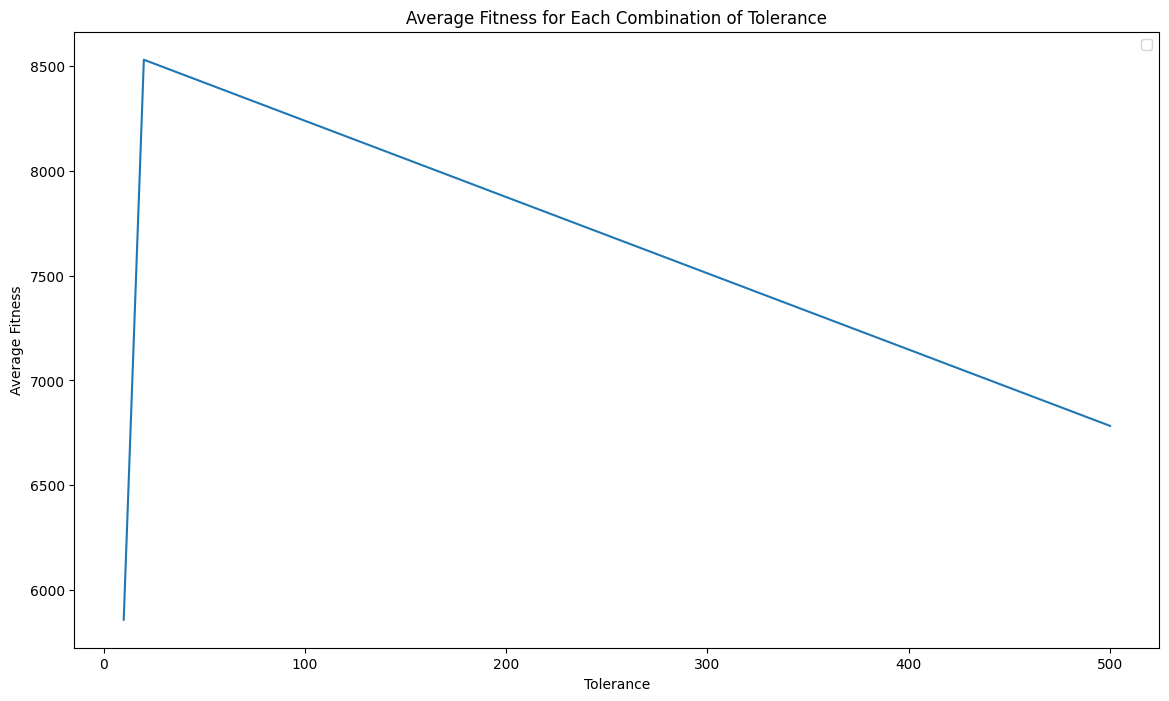

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


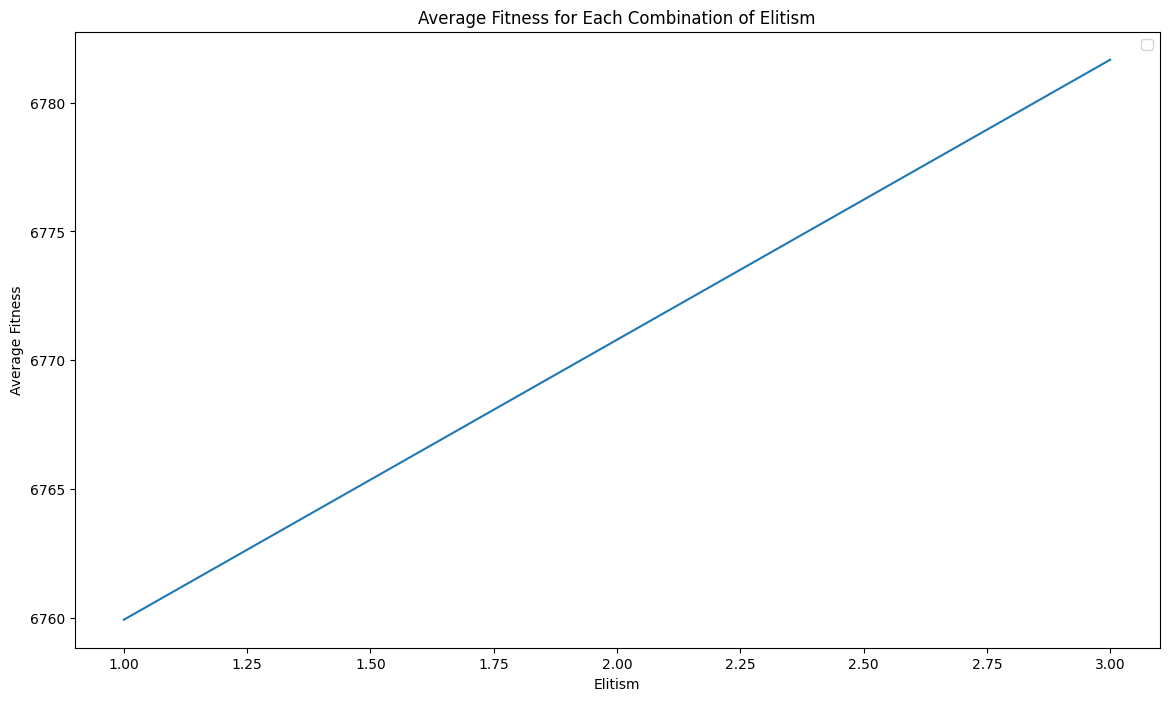

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Visualization averaging fitness for each combination of mutation, selection, and Crossover
plt.figure(figsize=(14, 8))
combination_1 = recent.groupby(['Mutation', 'Selection', 'Crossover'])['Fitness'].mean().reset_index()
sns.lineplot(x='Selection', y='Fitness', hue='Mutation', style='Crossover', recent=combination_1)
plt.xlabel('Selection Function')
plt.ylabel('Average Fitness')
plt.title('Average Fitness for Each Combination of Mutation, Selection, and Crossover')
plt.legend(loc='best')
plt.show()

# 2. Visualization averaging fitness for each combination of mutation with mut prob
plt.figure(figsize=(14, 8))
combination_2 = recent.groupby(['Mutation', 'Mut prob'])['Fitness'].mean().reset_index()
sns.lineplot(x='Mut prob', y='Fitness', hue='Mutation', recent=combination_2)
plt.xlabel('Mutation Probability')
plt.ylabel('Average Fitness')
plt.title('Average Fitness for Each Combination of Mutation with Mutation Probability')
plt.legend(loc='best')
plt.show()

# 3. Visualization averaging fitness for each combination of Crossover with xo prob
plt.figure(figsize=(14, 8))
combination_3 = results.groupby(['Crossover', 'Xo prob'])['Fitness'].mean().reset_index()
sns.lineplot(x='Xo prob', y='Fitness', hue='Crossover', results=combination_3)
plt.xlabel('Crossover Probability')
plt.ylabel('Average Fitness')
plt.title('Average Fitness for Each Combination of Crossover with Crossover Probability')
plt.legend(loc='best')
plt.show()




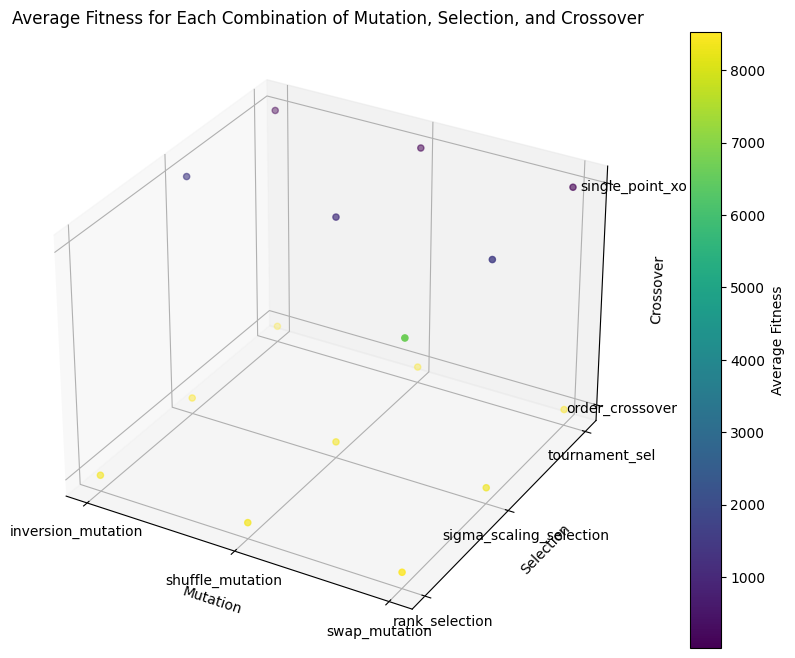

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV results into a DataFrame
results = pd.read_csv('results.csv')

# Group the results by mutation, selection, and crossover to calculate the average fitness
combination_1 = results.groupby(['Mutation', 'Selection', 'Crossover'])['Fitness'].mean().reset_index()

# Create a dictionary to map string labels to integers for plotting
label_mapping = {
    'Mutation': {label: idx for idx, label in enumerate(combination_1['Mutation'].unique())},
    'Selection': {label: idx for idx, label in enumerate(combination_1['Selection'].unique())},
    'Crossover': {label: idx for idx, label in enumerate(combination_1['Crossover'].unique())}
}

# Map the labels to integers
combination_1['Mutation'] = combination_1['Mutation'].map(label_mapping['Mutation'])
combination_1['Selection'] = combination_1['Selection'].map(label_mapping['Selection'])
combination_1['Crossover'] = combination_1['Crossover'].map(label_mapping['Crossover'])

# Create a 3D plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(combination_1['Mutation'], combination_1['Selection'], combination_1['Crossover'], c=combination_1['Fitness'], cmap='viridis')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Average Fitness')

# Set axis labels
ax.set_xlabel('Mutation')
ax.set_ylabel('Selection')
ax.set_zlabel('Crossover')

# Set tick labels to the original labels
ax.set_xticks(list(label_mapping['Mutation'].values()))
ax.set_xticklabels(list(label_mapping['Mutation'].keys()))
ax.set_yticks(list(label_mapping['Selection'].values()))
ax.set_yticklabels(list(label_mapping['Selection'].keys()))
ax.set_zticks(list(label_mapping['Crossover'].values()))
ax.set_zticklabels(list(label_mapping['Crossover'].keys()))

plt.title('Average Fitness for Each Combination of Mutation, Selection, and Crossover')
plt.show()


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 4. Visualization averaging fitness for each combination of Tolerance
plt.figure(figsize=(14, 8))
combination_4 = results.groupby(['Tolerance'])['Fitness'].mean().reset_index()
fig = px.line(combination_4, x="Tolerance", y="Fitness")
fig.show()

# 5. Visualization averaging fitness for each combination of elitism
plt.figure(figsize=(14, 8))
combination_5 = results.groupby(['Elitism'])['Fitness']
fig = px.box(results, x="Elitism", y="Fitness")
fig.show()


<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

# Best Fitness

In [48]:
recent.loc[recent['Fitness'].idxmin()]

Fitness                                          6324
Best fitness                                     6324
Generation                                          0
Last improved geneneration                          0
Xo prob                                          0.99
Mut prob                                          0.1
Selection                     sigma_scaling_selection
Crossover                             order_crossover
Mutation                           inversion_mutation
Generations                                       100
Elitism                                             3
Tolerance                                          20
Name: 246700, dtype: object

# Genetic Operators comparison table

In [9]:
crossover_functions = ['order_crossover', 'single_point_xo', 'position_based_crossover', 'geometric_xo']
selection_functions = ['tournament_sel', 'sigma_scaling_selection', 'rank_selection']
mutation_functions = ['swap_mutation', 'inversion_mutation', 'shuffle_mutation']

# Group by selection, mutation, and crossover functions, then calculate mean fitness
grouped = recent.groupby(['Selection', 'Mutation', 'Crossover'])['Fitness'].mean().reset_index()

# Pivot the table to get the desired format
pivot_table = grouped.pivot_table(values='Fitness', index=['Selection', 'Mutation'], columns='Crossover').reset_index()

# Rename the columns for clarity
pivot_table.columns.name = None

pivot_table

Selection            Mutation  geometric_xo  order_crossover  \
0           rank_selection  inversion_mutation       8516.25              NaN   
1           rank_selection    shuffle_mutation       8367.25              NaN   
2           rank_selection       swap_mutation       8447.75              NaN   
3  sigma_scaling_selection  inversion_mutation       8265.00    157674.788472   
4  sigma_scaling_selection    shuffle_mutation       8500.25    174360.015328   
5  sigma_scaling_selection       swap_mutation       8571.75    157915.038681   
6           tournament_sel  inversion_mutation       8432.50      8873.640000   
7           tournament_sel    shuffle_mutation       8402.25      8816.339167   
8           tournament_sel       swap_mutation       8399.25      8785.768333   

   single_point_xo  
0          8485.50  
1          8238.50  
2          8399.00  
3          8360.75  
4          8471.00  
5          8444.00  
6          8362.25  
7          8399.50  
8          8427.75

## Parameters comparison tables

In [60]:
# Define the parameters
generations = [100, 200]
elite_size = [0, 1, 3]
xo_probs = [0.99, 0.9]
mut_probs = [0.2, 0.1]
plateau_tolerance = [20, 500]

# Filter recent to only include rows with the specified values
filtered_recent = recent[
    (recent['Xo prob'].isin(xo_probs)) &
    (recent['Mut prob'].isin(mut_probs)) 
]

# Group by each parameter and calculate the mean fitness
grouped_xo_probs = filtered_recent.groupby('Xo prob')['Fitness'].mean().reset_index()
grouped_mut_probs = filtered_recent.groupby('Mut prob')['Fitness'].mean().reset_index()

print("\nAverage Fitness by Crossover Probability:")
print(grouped_xo_probs)
print("\nAverage Fitness by Mutation Probability:")
print(grouped_mut_probs)



Average Fitness by Crossover Probability:
   Xo prob       Fitness
0     0.90  62768.934363
1     0.99  79321.155541

Average Fitness by Mutation Probability:
   Mut prob       Fitness
0       0.1  69084.292461
1       0.2  74106.818271


In [59]:
recent.groupby('Generations')['Fitness'].mean().reset_index()

Generations       Fitness
0          100  75232.406290
1          200  76023.480543

In [53]:
recent.groupby(['Tolerance'])['Fitness'].mean().reset_index()

Tolerance       Fitness
0         20  75912.019113
1        500  75603.526985

In [52]:
recent.groupby(['Elitism'])['Fitness'].mean().reset_index()

Elitism        Fitness
0        0  209387.945769
1        1    8513.371981
2        3    8532.034884